In [173]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
import pandas as pd
import numpy as np
from model import *

In [519]:
cm = CompleteModel(['mean', 'cov', 'std', 'mad', 'med'], 'meg_mci.csv')

In [444]:
from scipy.spatial.distance import squareform

In [522]:
imp = {}

In [590]:
for f in ['mean', 'cov', 'std', 'mad', 'med']:    
    clist = []
    for i in tqdm(range(300)):
        cols = [c for c in cm.train.feats if (f in c) & ~('errank' in c)]
        samp = cm.train.feats[cols].sample(frac=0.5, replace=False)
        sy = cm.train.target.loc[samp.index]
        rnk = pd.Series(f_classif(samp, sy)[1], samp.columns)
        cc = squareform(rnk)
        clist.append(cc.reshape(cc.shape[0], -1, 1))
    ctens = np.concatenate(clist, axis=2)
    del clist
    imp[f] = np.mean(ctens, axis=2)
    del ctens

100%|████████████████████████████████████████| 300/300 [00:10<00:00, 27.45it/s]


In [ ]:
for f in ['mean', 'cov', 'std', 'mad', 'med']:  
    fig = plt.figure()
    sns.heatmap(imp[f], cmap='viridis')
    fig.set_size_inches(10, 8)
    ax = plt.gca()
    ax.set_title(f)

In [529]:
from scipy.ndimage.filters import convolve

In [596]:
kimp = {}
for f in imp:
    kernel = np.ones((4, 4))/16
    kimp[f] = convolve(imp[f], kernel)

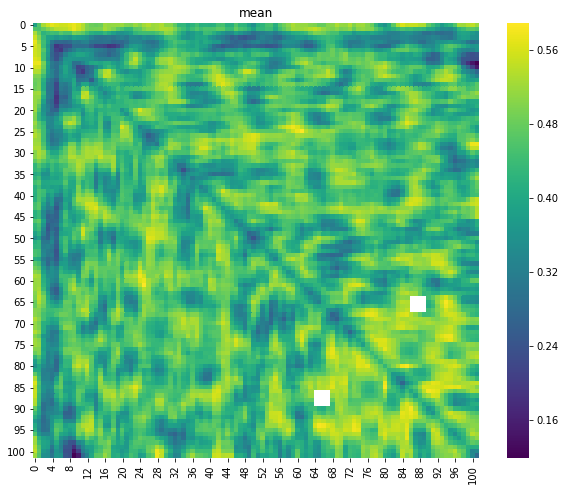

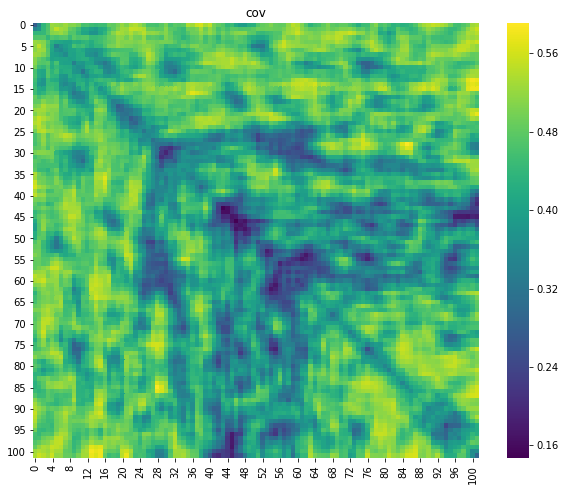

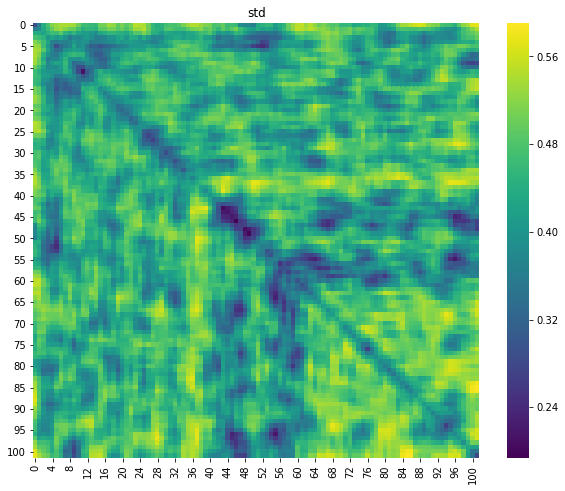

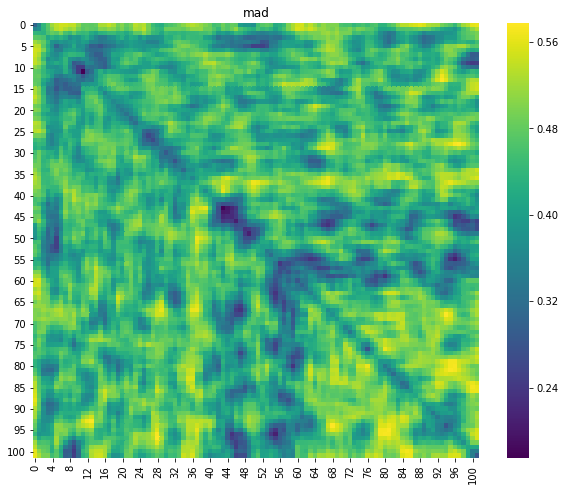

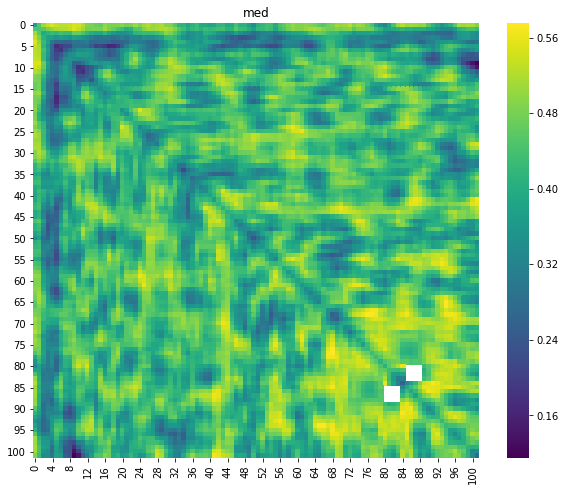

In [599]:
for f in ['mean', 'cov', 'std', 'mad', 'med']:  
    fig = plt.figure()
    sns.heatmap(kimp[f], cmap='viridis')
    fig.set_size_inches(10, 8)
    ax = plt.gca()
    ax.set_title(f)

In [189]:
len(set(data.columns))

25760

In [191]:
cm.generate_selection(limits)

['sync_5_89.mean',
 'sync_52_91.mean',
 'sync_6_42.mean',
 'sync_59_101.cov',
 'sync_33_65.std',
 'sync_40_83.mean',
 'sync_49_53.cov',
 'sync_41_101.cov',
 'sync_13_90.std',
 'sync_46_99.std',
 'sync_36_39.mean',
 'sync_40_84.mean']

In [213]:
cm.ranker.ranking.loc[['sync_52_91.mean',
 'sync_6_42.mean',
 'sync_59_101.cov',
 'sync_33_65.std',
 'sync_40_83.mean',
 'sync_49_53.cov',
 'sync_41_101.cov', 'errank cov', 'errank std']]

,MI,pvals,ranking mi,ranking pvals,mixed_ranking
sync_52_91.mean,0.132986,-0.001590,15408.0,15312.0,15360.0
sync_6_42.mean,0.122938,-0.001135,15374.0,15342.0,15358.0
sync_59_101.cov,0.130073,-0.001641,15401.0,15309.0,15355.0
sync_33_65.std,0.173948,-0.002278,15451.0,15255.0,15353.0
sync_40_83.mean,0.145829,-0.004255,15432.0,15104.0,15268.0
sync_49_53.cov,0.106894,-0.002161,15266.0,15263.0,15264.5
sync_41_101.cov,0.110326,-0.002991,15303.0,15196.0,15249.5
errank cov,0.112872,-0.006076,15323.0,14979.0,15151.0
errank std,0.066939,-0.000299,14303.0,15427.0,14865.0


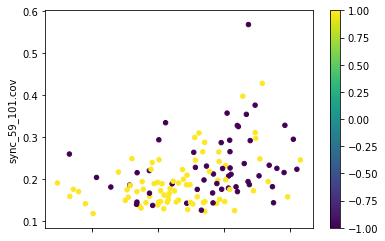

In [205]:
cm.train.feats.plot.scatter('errank std', 'sync_59_101.cov', c=cm.train.target,
                           cmap='viridis')

In [290]:
cm.train.feats.shape[0]

132

In [352]:
del data

In [394]:
cm.ranker.ranking['MI'].max(), cm.ranker.ranking['MI'].idxmax()

(0.4330811565846302, 'sync_60_90.mean')

In [393]:
cm.ranker.ranking['pvals'].max(), cm.ranker.ranking['pvals'].idxmax()

(-0.00018342444302976358, 'sync_62_74.cov')

In [407]:
cm = CompleteModel(['mean', 'cov', 'std'], 'meg_mci.csv')


In [413]:
sc2, rocc2 = cm.makeCVSimulations(limits, n_sims=10, frac_test=0.7, nfeats=3,
                                  limit_corr=0.5, criterion='ranking pvals', selected=None)

  0%|                                                   | 0/10 [00:00<?, ?it/s]

40 92


 10%|████▎                                      | 1/10 [00:35<05:21, 35.71s/it]

40 92


 20%|████████▌                                  | 2/10 [01:10<04:41, 35.20s/it]

40 92


 30%|████████████▉                              | 3/10 [01:45<04:05, 35.06s/it]

40 92


 40%|█████████████████▏                         | 4/10 [02:21<03:32, 35.47s/it]

40 92


 50%|█████████████████████▌                     | 5/10 [02:58<02:58, 35.71s/it]

40 92


 60%|█████████████████████████▊                 | 6/10 [03:33<02:22, 35.53s/it]

40 92


 70%|██████████████████████████████             | 7/10 [04:08<01:46, 35.46s/it]

40 92


 80%|██████████████████████████████████▍        | 8/10 [04:43<01:10, 35.46s/it]

40 92


 90%|██████████████████████████████████████▋    | 9/10 [05:18<00:35, 35.33s/it]

40 92


100%|██████████████████████████████████████████| 10/10 [05:54<00:00, 35.43s/it]


In [414]:
sc2.mean()

0.5816788038900321

In [415]:
cm.train.feats.shape

(132, 15456)

In [416]:
import matplotlib.pyplot as plt

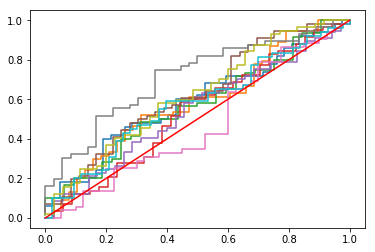

In [417]:
for i in rocc2:
    plt.plot(rocc2.loc[0, i], rocc2.loc[1, i])
plt.plot([0, 1], [0, 1], c='r')

In [338]:
cm.kernel.active_dims

array([0, 1, 2])

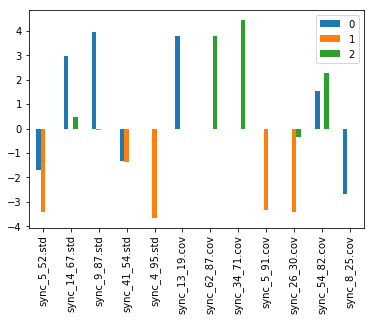

In [331]:
pd.DataFrame(cm.dimreducer.pca.components_.T, index=cm.selected).plot.bar()

In [332]:
cm.model.flattened_parameters

[gp_classification.rbf.variance:
 Param([17.48390371]), gp_classification.rbf.lengthscale:
 Param([0.52486582, 0.53735501, 0.68044845])]

In [234]:
cm.kernel.lengthscale

index,gp_classification.rbf.lengthscale,constraints,priors
[0],0.39040281,+ve,
[1],0.56440840,+ve,
[2],477.05019442,+ve,


In [221]:
sc.describe()

count    10.000000
mean      0.875409
std       0.047080
min       0.797276
25%       0.838759
50%       0.900243
75%       0.905732
max       0.933333
dtype: float64

In [222]:
sc2.describe()

count    10.000000
mean      0.869633
std       0.022804
min       0.820384
25%       0.862213
50%       0.873064
75%       0.881963
max       0.896610
dtype: float64

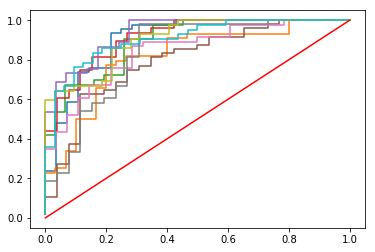

In [150]:
for i in rocc:
    plt.plot(rocc.loc[0, i], rocc.loc[1, i])
plt.plot([0, 1], [0, 1], c='r')

In [149]:
cm.model.

index,gp_classification.rbf.lengthscale,constraints,priors
[0],0.36299856,+ve,
[1],0.70943914,+ve,
[2],0.58539061,+ve,


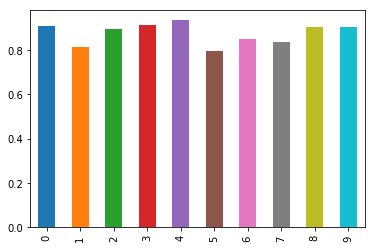

In [144]:
sc.plot.bar()

In [152]:
limits

{'MI': 0.1, 'pvals': -0.01}

In [ ]:
rocc2 = pd.DataFrame()

In [128]:
rocc[0].loc[2]

array([0.94816019, 0.91210062, 0.91152256, 0.87020269, 0.8682457 ,
       0.83584744, 0.82226551, 0.74533329, 0.71336175, 0.71323492,
       0.67526617, 0.48931128, 0.44033998, 0.4400823 , 0.43945101,
       0.4359666 , 0.31008118, 0.29683757, 0.02847268])

 C:\Users\Maria\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


TypeError: You must first set_array for mappable

 C:\Users\Maria\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


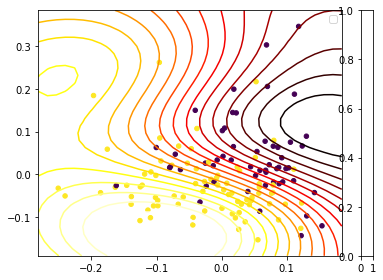

In [101]:
X = cm.dimreducer.transformPCA(cm.train.feats[cm.selected])
ax = cm.model.plot_f(visible_dims=[0, 1])
pd.DataFrame(X).plot.scatter(0, 1, c=cm.train.target[:, 0], ax=ax, cmap='viridis')

In [74]:
rank.ranking.sort_values('mixed_ranking').tail(5)

,MI,pvals,ranking mi,ranking pvals,mixed_ranking
sync_6_42.mean,0.122938,-0.001135,15371.0,15340.0,15355.5
sync_52_91.mean,0.132986,-0.001590,15405.0,15310.0,15357.5
sync_50_51.mean,0.120491,-0.000767,15359.0,15380.0,15369.5
sync_59_74.mean,0.131234,-0.000912,15401.0,15361.0,15381.0
sync_5_89.mean,0.122947,-0.000064,15372.0,15447.0,15409.5


In [43]:
import seaborn as sns

In [49]:
sorted_rank = self.ranking.sort_values('mixed_ranking', ascending=False)

In [59]:
bol = pd.Series(True, index=sorted_rank.index)

In [63]:
for k in limits:
    bol = bol&~(sorted_rank[k]<limits[k])